<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

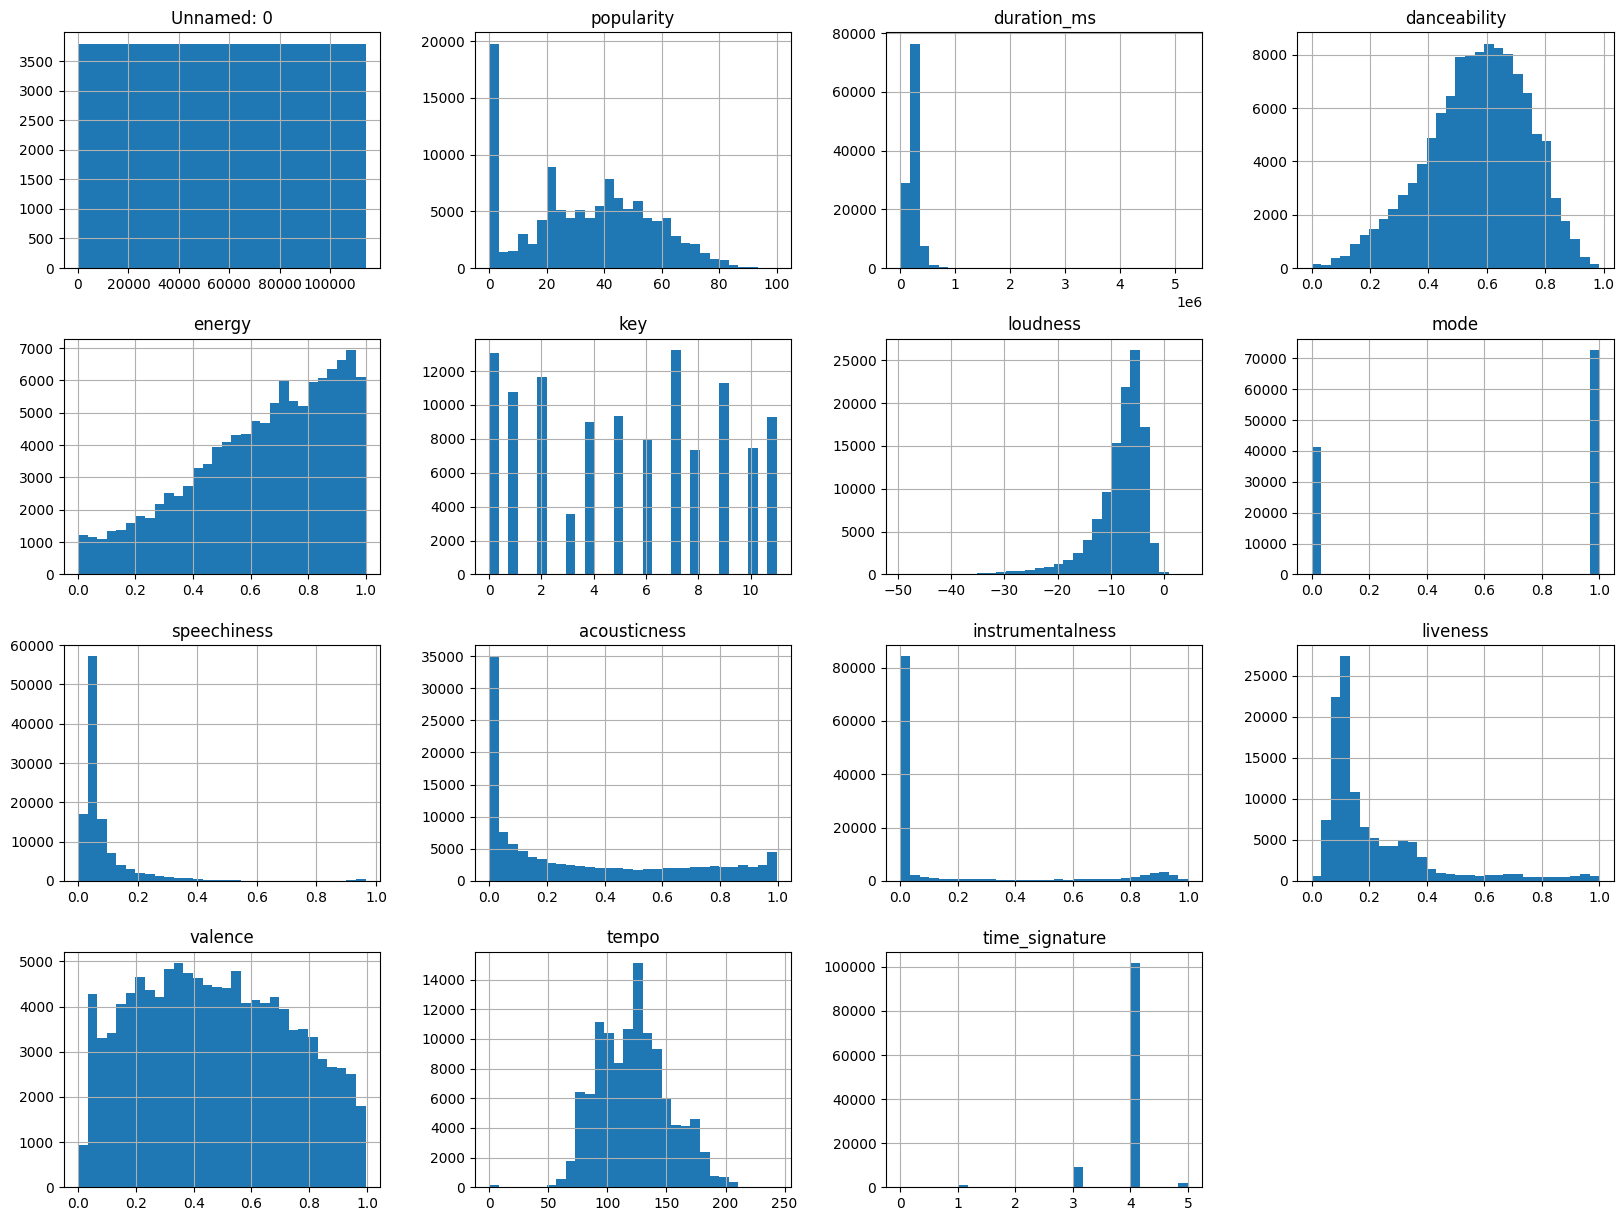

ValueError: could not convert string to float: '5SuOikwiRyPMVoIQDJUgSV'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('dataset.csv')

# Первичный анализ данных
print(df.info())
print(df.describe())
print(df.isnull().sum())
# Гистограммы для числовых признаков
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Корреляционная матрица
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Корреляция с таргетом (предположим, что таргет - это 'popularity')
target_corr = corr_matrix['popularity'].sort_values(ascending=False)
print(target_corr)
# Пример создания нового признака
df['energy_danceability'] = df['energy'] * df['danceability']

# Проверка корреляции нового признака с таргетом
new_feature_corr = df[['energy_danceability', 'popularity']].corr()
print(new_feature_corr)
from sklearn.ensemble import RandomForestRegressor

# Подготовка данных
X = df.drop(columns=['popularity'])
y = df['popularity']

# Модель для определения важности признаков
model = RandomForestRegressor()
model.fit(X, y)

# Важность признаков
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Линейная регрессия
lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')
lin_rmse_scores = np.sqrt(-lin_scores)
print("Linear Regression RMSE:", lin_rmse_scores.mean())
from sklearn.tree import DecisionTreeRegressor

# Дерево решений
tree_reg = DecisionTreeRegressor()
tree_scores = cross_val_score(tree_reg, X, y, cv=5, scoring='neg_mean_squared_error')
tree_rmse_scores = np.sqrt(-tree_scores)
print("Decision Tree RMSE:", tree_rmse_scores.mean())
from xgboost import XGBRegressor

# Градиентный бустинг
xgb_reg = XGBRegressor()
xgb_scores = cross_val_score(xgb_reg, X, y, cv=5, scoring='neg_mean_squared_error')
xgb_rmse_scores = np.sqrt(-xgb_scores)
print("XGBoost RMSE:", xgb_rmse_scores.mean())
# Выбор лучшей модели
best_model = XGBRegressor()  # Предположим, что XGBoost показал лучшие результаты
best_model.fit(X, y)

# Финальная оценка
final_predictions = best_model.predict(X)
final_rmse = np.sqrt(mean_squared_error(y, final_predictions))
print("Final RMSE:", final_rmse)